#### <b>  Import necessary libraries

In [1]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, mean_squared_error, f1_score, accuracy_score
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error, f1_score, accuracy_score, recall_score
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("dataset/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Print column names along with their data types
print("Columns with their data types:")
for column in data.columns:
    print(column, ":", data[column].dtype)

Columns with their data types:
Time : float64
V1 : float64
V2 : float64
V3 : float64
V4 : float64
V5 : float64
V6 : float64
V7 : float64
V8 : float64
V9 : float64
V10 : float64
V11 : float64
V12 : float64
V13 : float64
V14 : float64
V15 : float64
V16 : float64
V17 : float64
V18 : float64
V19 : float64
V20 : float64
V21 : float64
V22 : float64
V23 : float64
V24 : float64
V25 : float64
V26 : float64
V27 : float64
V28 : float64
Amount : float64
Class : int64


In [6]:
#Checking categorical columns in the columns:
categorical_cols = []
for cols in data.columns:
    if (data[cols].dtype == 'object'):
        categorical_cols.append(cols)
print(categorical_cols)
print(len(categorical_cols))

[]
0


In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.isna().sum().sum()

0

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
print("Persentage of Y: \n")
data['Class'].value_counts()/len(data['Class'])*100

Persentage of Y: 



Class
0    99.827251
1     0.172749
Name: count, dtype: float64

In [12]:
print("Data imbalance ratio: " ,492/284315 )

Data imbalance ratio:  0.0017304750013189597


Text(0.5, 1.0, 'Count of Target: ')

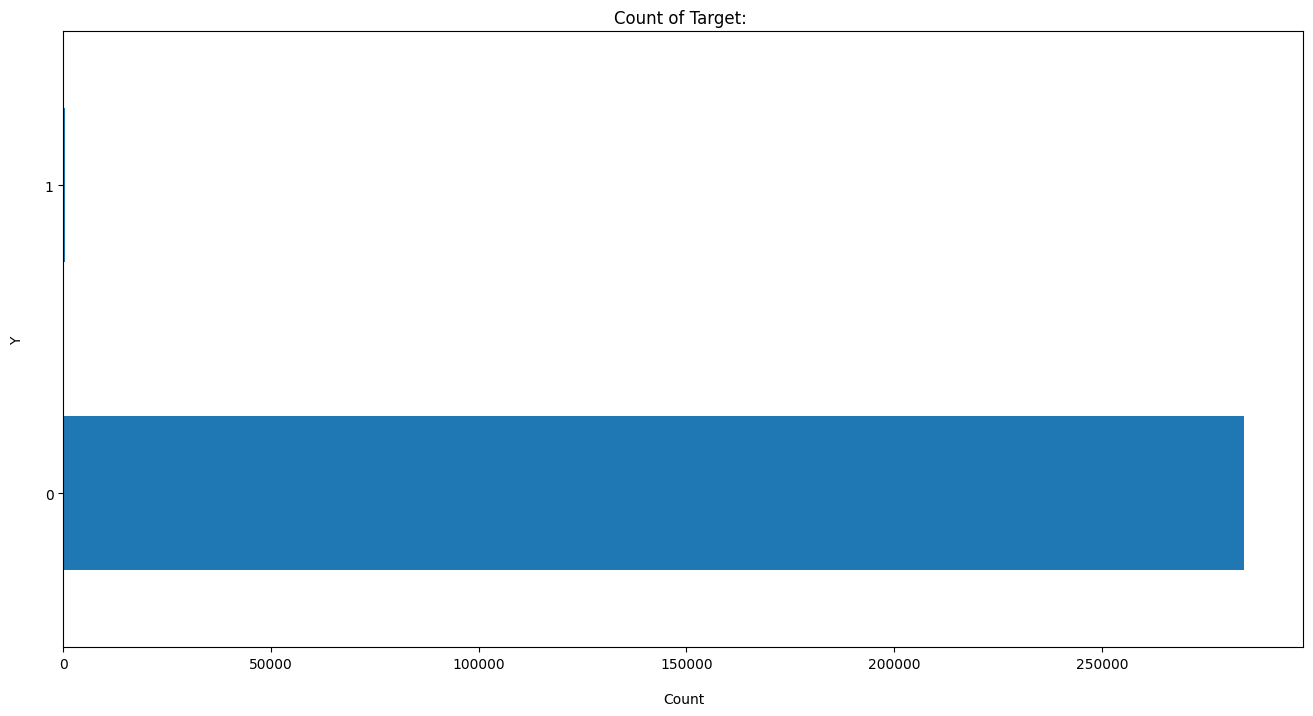

In [13]:
data['Class'].value_counts().plot( kind = 'barh', figsize=(16,8), )
plt.xlabel("Count", labelpad= 15)
plt.ylabel("Y", labelpad= 15)
plt.title("Count of Target: ")

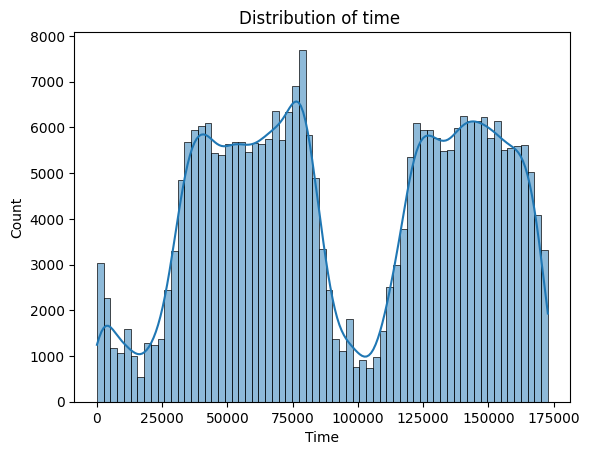

In [14]:
sns.histplot(data=data, x='Time',kde=True)
plt.title('Distribution of time ')
plt.show()

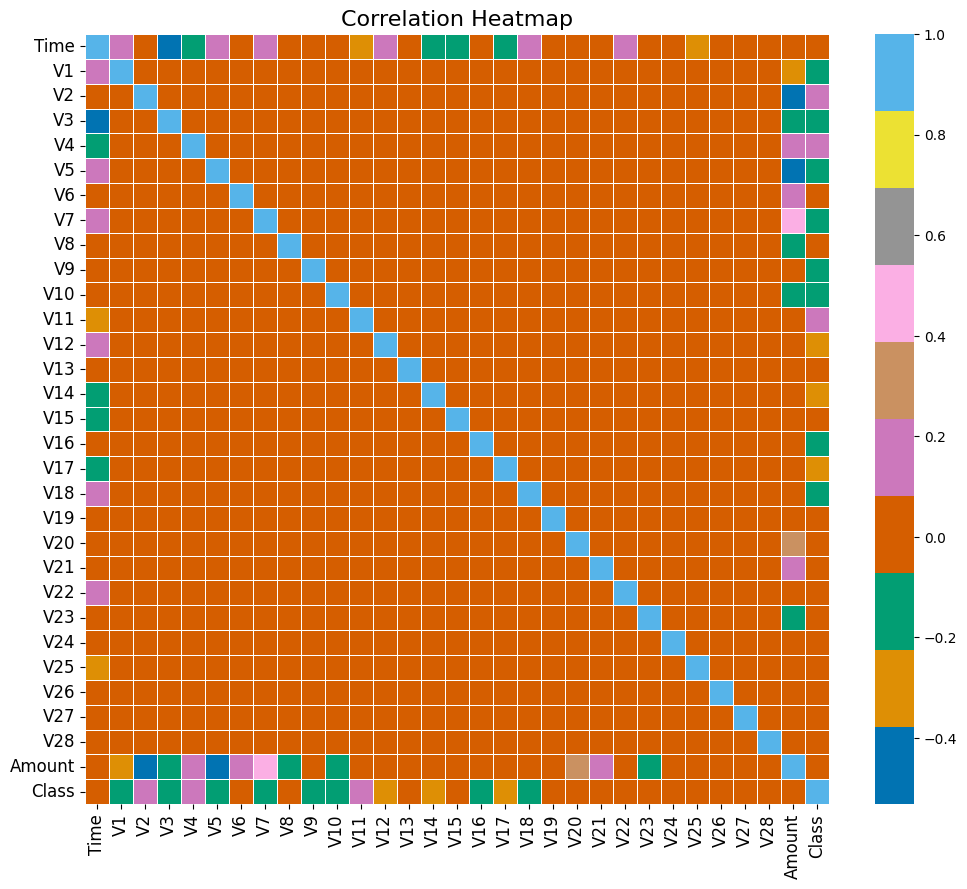

In [15]:
color_palette = sns.color_palette("colorblind", as_cmap=True)
plt.figure(figsize=(12, 10))
sns.heatmap(data = data.corr(), annot=False, linewidths=0.5,cmap=color_palette)
plt.title('Correlation Heatmap', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [16]:
y = data['Class']
X=data.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [17]:
#SMOTE Algorithm
smt = SMOTE()
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_train, y_train, test_size = 0.33, random_state=42)
#Printing The Shape of #SMOTE Algorithm
print("Shape of X_train_sm :",X_train_sm.shape)
print("Shape of X_train_sm :", X_train_sm.shape)
print("Value count in y_sm \n", y_train_sm.value_counts())

Shape of X_train_sm : (143115, 30)
Shape of X_train_sm : (143115, 30)
Value count in y_sm 
 Class
0    142858
1       257
Name: count, dtype: int64


In [18]:
X_train_sm.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

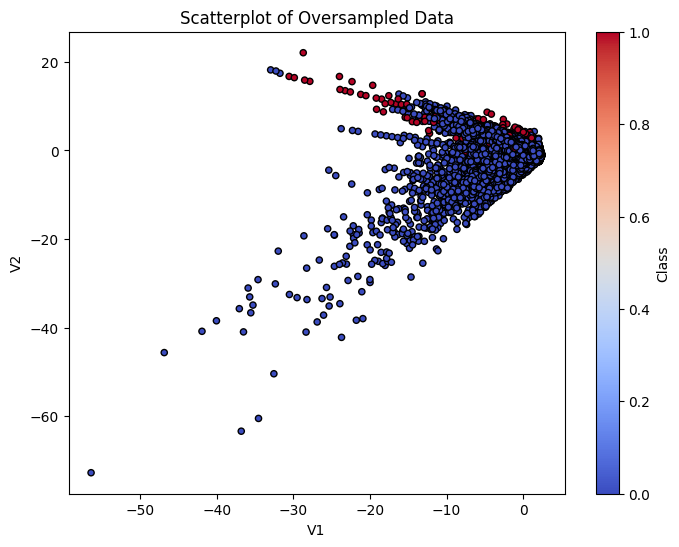

In [19]:
# Plot the scatterplot of the first two features (X1 and X2)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_sm['V1'], X_train_sm['V2'], c=y_train_sm, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.title('Scatterplot of Oversampled Data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.colorbar(label='Class')
plt.show()

In [20]:
#ADASYN Algorithm 

ada = ADASYN(random_state=130)
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_train, y_train, test_size=0.33, random_state=42)


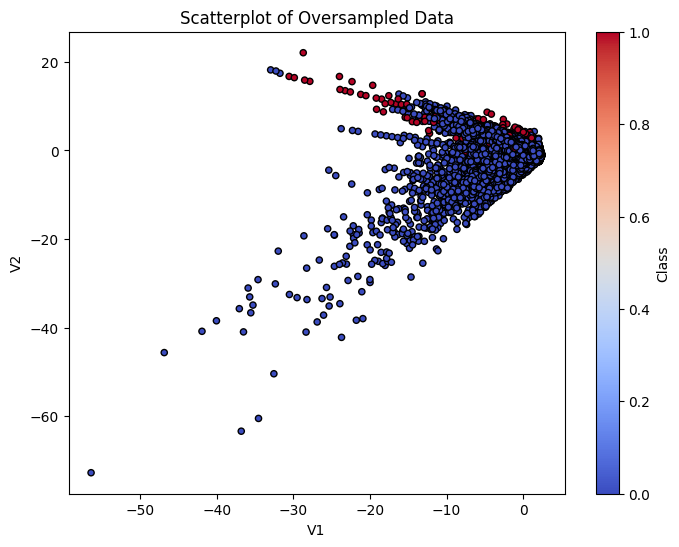

In [21]:
# Plot the scatterplot of the first two features (X1 and X2)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_ada['V1'], X_train_ada['V2'], c=y_train_ada, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.title('Scatterplot of Oversampled Data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.colorbar(label='Class')
plt.show()

In [22]:
#SMOTE Boderline

smt_br = BorderlineSMOTE()
X_train_smb, X_test_smb, y_train_smb, y_test_smb = train_test_split(X_train, y_train, test_size = 0.33, random_state=42)



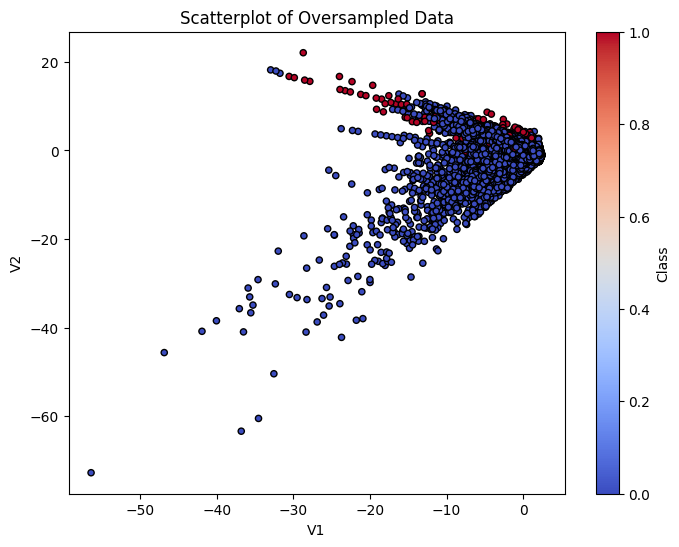

In [23]:
# Plot the scatterplot of the first two features (X1 and X2)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_smb['V1'], X_train_smb['V2'], c=y_train_smb, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.title('Scatterplot of Oversampled Data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.colorbar(label='Class')
plt.show()

## <b> Data Processing Layer 

<b> <ol><li> CGES (Compound Grouping Elimination Stragey)
        <li> MFSEM (Multi-factor Synchronous Embedding Mechnism)
        <li> SOBT (Spiral Oversampling Balancing Technique)

In [24]:

# Utility functions
def stats_mv(X):
    # Implement missing value statistics
    return np.sum(np.isnan(X), axis=0)

def corr_ana(X):
    # Implement correlation analysis
    return np.corrcoef(X, rowvar=False)

def cpd_group(Fm, Fc):
    # Implement compound grouping
    Gm = np.where(Fm > 0)[0]
    Gc = np.where(abs(Fc) > 0.8)  # Example threshold for high correlation
    return Gm, Gc

def update_feature_count(X):
    # Implement feature count updating
    return X.shape[1]

def KMeans_plus_plus(X, n_clusters):
    # Implement K-Means++ clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(X)
    return kmeans.cluster_centers_, kmeans.labels_

def construct_spiral(Ccen, X_fraud):
    # Extract center coordinates
    x_center, y_center = Ccen
    
    # Extract coordinates of fraud data
    x_fraud, y_fraud = X_fraud
    
    # Calculate distances from center to fraud data points
    distances = np.sqrt((x_fraud - x_center) ** 2 + (y_fraud - y_center) ** 2)
    
    # Generate angles for spiral curve based on distances
    angles = distances * 2 * np.pi
    
    # Generate spiral curve coordinates
    x_spiral = x_center + distances * np.cos(angles)
    y_spiral = y_center + distances * np.sin(angles)
    
    return x_spiral, y_spiral

def map_to_linear_space(Artisam):
    linear_space_samples = []
    for sample in Artisam:
        if len(sample) > 0:
            linear_space_samples.append(np.concatenate(sample, axis=1))
    
    if len(linear_space_samples) > 0:
        return np.concatenate(linear_space_samples)
    else:
        return np.array([]) 


In [25]:

# CGEA (Compound Grouping Elimination Algorithm)
# Step 1: Group features by missing values
Fm = stats_mv(X)
    
# Step 2: Group features by correlation
Fc = corr_ana(X)
Gm, Gc = cpd_group(Fm, Fc)
    
# Step 3: Eliminate redundant features
Fres = []
N_f_amt, N_f_max = 0, 0
for i in range(len(Gm)):
    for j in range(len(Gc)):
        N_f_amt = update_feature_count(X_train)
        if N_f_amt >= N_f_max:
            N_f_max = N_f_amt
            Fres.append(Gc[j])


In [26]:
# MSEFBoost (Multifactor Synchronous Embedding Feature Boosting)
from sklearn.metrics import roc_auc_score, mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

# Train decision tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Predict using the trained model
y_pred = dtr.predict(X_train)

# Calculate AUC and MSE
VAUC = roc_auc_score(y_train, y_pred)
VMSE = mean_squared_error(y_train, y_pred)
VAMsub = VAUC - VMSE

# Train LightGBM classifier
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

# Get feature importances
feature_importances = lgbm.feature_importances_

# Calculate metamorphic factor
meFac = feature_importances / sum(feature_importances) + (VAUC - VMSE) ** -1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 213605, number of used features: 30
[LightGBM] [Info] Start training from score 0.001774


In [27]:
# SOBT (Spiral Oversampling Balancing Technique)
# Step 1: Clustering
n_clusters = 2
Ccen, Ctag = KMeans_plus_plus(X_train, n_clusters)
    
# Step 2: Construct 3D spiral model
Nsample = sum(y_train == 1) - sum(y_train == 0)
Artisam = []
for i in range(len(Ctag)):
    Min_prop = sum(y_train[Ctag == i] == 1) / sum(y_train == 1)
    NC_count = int(Min_prop * Nsample)
        
    if Min_prop == 0:
        continue
        
    for j in range(NC_count):
        N_gen = NC_count // sum(y_train[Ctag == i] == 1)
        Z = construct_spiral(Ccen[i], X_train[Ctag == i][j])
        X_new = np.sin(Z) * Z
        Y_new = np.cos(Z) * Z
            
        Artisam.append([X_new, Y_new, Z])
    


In [28]:
# Step 3: Generate artificial samples
Samplere = map_to_linear_space(Artisam)

# Fraud detection
# Feature engineering
if len(Fres) == 0:
    # If there are no features selected for elimination, use all features
    X_train_new = X_train
    X_test_new = X_test
else:
    # Use only the selected features for further processing
    X_train_new = X_train[:, Fres]
    X_test_new = X_test[:, Fres]

    
# Oversampling
X_train_balanced = Samplere
    
# Feature boosting
X_train_boosted = X_train_new * meFac

## <b> Predictive Classification Layer

<ul>
<li><b> LightGBM Predictive Model
<li><b> Random Forest Classifier 

In [29]:

LGBM_model = LGBMClassifier()


In [30]:
rf_classifier = RandomForestClassifier()

In [33]:
# Train LightGBM model on SOBT
LGBM_model.fit(X_train_boosted, y_train)

# Evaluate model for SOBT (LightGBM)
y_pred_sobt = LGBM_model.predict(X_test_new)
accuracy_sobt = accuracy_score(y_test, y_pred_sobt)  # Fix the typo here
precision_sobt = precision_score(y_test, y_pred_sobt)  # Fix the typo here
recall_sobt = recall_score(y_test, y_pred_sobt)  # Fix the typo here
f1_sobt = f1_score(y_test, y_pred_sobt)  # Fix the typo here
auc_sobt = roc_auc_score(y_test, y_pred_sobt)  # Fix the typo here
cm_sobt = confusion_matrix(y_test, y_pred_sobt)  # Fix the typo here
gmean_sobt = geometric_mean_score(y_test, y_pred_sobt)  # Fix the typo here

print("Accuracy for SOBT (LGMB):", accuracy_sobt)
print("Precision for SOBT (LGMB):", precision_sobt)
print("Recall for SOBT (LGMB):", recall_sobt)
print("F1 Score for SOBT (LGMB):", f1_sobt)
print("AUC for SOBT (LGMB):", auc_sobt)
print("G-Mean for SOBT (LGMB):", gmean_sobt)
print("Confusion Matrix for SOBT (LGMB):")
print(cm_sobt)

[LightGBM] [Info] Number of positive: 379, number of negative: 213226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 213605, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001774 -> initscore=-6.332572
[LightGBM] [Info] Start training from score -6.332572
Accuracy for SOBT (LGMB): 0.9958989916013595
Precision for SOBT (LGMB): 0.17689530685920576
Recall for SOBT (LGMB): 0.4336283185840708
F1 Score for SOBT (LGMB): 0.2512820512820513
AUC for SOBT (LGMB): 0.7152105356653139
G-Mean for SOBT (LGMB): 0.657447766252405
Confusion Matrix for SOBT (LGMB):
[[70861   228]
 [   64    49]]


In [35]:
# Train RF model for SOBT
# Initialize and train Random Forest classifier
rf_classifier.fit(X_train_boosted, y_train)

# Make predictions on the test data
y_pred_sobt_rf = rf_classifier.predict(X_test)

# Calculate evaluation metrics for SOBT (Random Forest)
accuracy_sobt_rf = accuracy_score(y_test, y_pred_sobt_rf)
precision_sobt_rf = precision_score(y_test, y_pred_sobt_rf)
recall_sobt_rf = recall_score(y_test, y_pred_sobt_rf)
f1_sobt_rf = f1_score(y_test, y_pred_sobt_rf)
auc_sobt_rf = roc_auc_score(y_test, y_pred_sobt_rf)

# Calculate G-mean
TN, FP, FN, TP = confusion_matrix(y_test, y_pred_sobt_rf).ravel()
gmean_sobt_rf = (TP / (TP + FN)) * (TN / (TN + FP))

# Confusion Matrix
cm_sobt_rf = confusion_matrix(y_test, y_pred_sobt_rf)

# Print evaluation metrics
print("Accuracy for SOBT (RF):", accuracy_sobt_rf)
print("Precision for SOBT (RF):", precision_sobt_rf)
print("Recall for SOBT (RF):", recall_sobt_rf)
print("F1 Score for SOBT (RF):", f1_sobt_rf)
print("ROC AUC for SOBT (RF):", auc_sobt_rf)
print("G-mean for SOBT (RF):", gmean_sobt_rf)
print("Confusion Matrix for SOBT (RF):\n", cm_sobt_rf)


Accuracy for SOBT (RF): 0.9995365298727564
Precision for SOBT (RF): 0.925531914893617
Recall for SOBT (RF): 0.7699115044247787
F1 Score for SOBT (RF): 0.8405797101449275
ROC AUC for SOBT (RF): 0.8849065181536743
G-mean for SOBT (RF): 0.7698356926883501
Confusion Matrix for SOBT (RF):
 [[71082     7]
 [   26    87]]


In [36]:
# Train LightGBM model for SMOTE 
LGBM_model.fit(X_train_sm, y_train_sm)
# Evaluate model for SMOTE (LightGBM)
y_pred_sm= LGBM_model.predict(X_test_sm)
accuracy_sm = accuracy_score(y_test_sm, y_pred_sm)
precision_sm = precision_score(y_test_sm, y_pred_sm)
recall_sm = recall_score(y_test_sm, y_pred_sm)
f1_sm = f1_score(y_test_sm, y_pred_sm)
auc_sm = roc_auc_score(y_test_sm, y_pred_sm)
cm_sm = confusion_matrix(y_test_sm, y_pred_sm)
gmean_sm = geometric_mean_score(y_test_sm, y_pred_sm)

print("Accuracy for SMOTE (LGMB):", accuracy_sm)
print("Precision for SMOTE (LGMB):", precision_sm)
print("Recall for SMOTE (LGMB):", recall_sm)
print("F1 Score for SMOTE (LGMB):", f1_sm)
print("AUC for SMOTE (LGMB):", auc_sm)
print("G-Mean for SMOTE (LGMB):", gmean_sm)
print("Confusion Matrix for SMOTE (LGMB):")
print(cm_sm)


[LightGBM] [Info] Number of positive: 257, number of negative: 142858
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 143115, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001796 -> initscore=-6.320530
[LightGBM] [Info] Start training from score -6.320530
Accuracy for SMOTE (LGMB): 0.9964392112356363
Precision for SMOTE (LGMB): 0.2704626334519573
Recall for SMOTE (LGMB): 0.6229508196721312
F1 Score for SMOTE (LGMB): 0.3771712158808933
AUC for SMOTE (LGMB): 0.8100187818233325
G-Mean for SMOTE (LGMB): 0.7881218208139857
Confusion Matrix for SMOTE (LGMB):
[[70163   205]
 [   46    76]]


In [37]:
#Train RF model for SMOTE
rf_classifier.fit(X_train_sm,y_train_sm)

# Evaluate model for SMOTE (RF)
y_pred_sm_rf= rf_classifier.predict(X_test_sm)
accuracy_sm_rf = accuracy_score(y_test_sm, y_pred_sm_rf)
precision_sm_rf = precision_score(y_test_sm, y_pred_sm_rf)
recall_sm_rf = recall_score(y_test_sm, y_pred_sm_rf)
f1_sm_rf = f1_score(y_test_sm, y_pred_sm_rf)
auc_sm_rf = roc_auc_score(y_test_sm, y_pred_sm_rf)
cm_sm_rf = confusion_matrix(y_test_sm, y_pred_sm_rf)
gmean_sm_rf = geometric_mean_score(y_test_sm, y_pred_sm_rf)

print("Accuracy for SMOTE (RF):", accuracy_sm_rf)
print("Precision for SMOTE (RF):", precision_sm_rf)
print("Recall for SMOTE (RF):", recall_sm_rf)
print("F1 Score for SMOTE (RF):", f1_sm_rf)
print("AUC for SMOTE (RF):", auc_sm_rf)
print("G-Mean for SMOTE (RF):", gmean_sm_rf)
print("Confusion Matrix for SMOTE (RF):")
print(cm_sm_rf)

Accuracy for SMOTE (RF): 0.9995460348985672
Precision for SMOTE (RF): 0.95
Recall for SMOTE (RF): 0.7786885245901639
F1 Score for SMOTE (RF): 0.8558558558558559
AUC for SMOTE (RF): 0.8893087347825763
G-Mean for SMOTE (RF): 0.8824019463133415
Confusion Matrix for SMOTE (RF):
[[70363     5]
 [   27    95]]


In [38]:
# Train LightGBM model for ADASYAN 
LGBM_model.fit(X_train_ada, y_train_ada)
# Evaluate model for ADASYAN (LightGBM)
y_pred_ada= LGBM_model.predict(X_test_ada)
accuracy_ada = accuracy_score(y_test_ada, y_pred_ada)
precision_ada = precision_score(y_test_ada, y_pred_ada)
recall_ada = recall_score(y_test_ada, y_pred_ada)
f1_ada = f1_score(y_test_ada, y_pred_ada)
auc_ada = roc_auc_score(y_test_ada, y_pred_ada)
cm_ada = confusion_matrix(y_test_ada, y_pred_ada)
gmean_ada = geometric_mean_score(y_test_ada, y_pred_ada)

print("Accuracy for ADASYN (LGMB):", accuracy_ada)
print("Precision for ADASYN (LGMB):", precision_ada)
print("Recall for ADASYN (LGMB):", recall_ada)
print("F1 Score for ADASYN (LGMB):", f1_ada)
print("AUC for ADASYN (LGMB):", auc_ada)
print("G-Mean for ADASYN (LGMB):", gmean_ada)
print("Confusion Matrix for ADASYN (LGMB):")
print(cm_ada)

[LightGBM] [Info] Number of positive: 257, number of negative: 142858
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 143115, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001796 -> initscore=-6.320530
[LightGBM] [Info] Start training from score -6.320530
Accuracy for ADASYN (LGMB): 0.9964392112356363
Precision for ADASYN (LGMB): 0.2704626334519573
Recall for ADASYN (LGMB): 0.6229508196721312
F1 Score for ADASYN (LGMB): 0.3771712158808933
AUC for ADASYN (LGMB): 0.8100187818233325
G-Mean for ADASYN (LGMB): 0.7881218208139857
Confusion Matrix for ADASYN (LGMB):
[[70163   205]
 [   46    76]]


In [39]:
#Train RF model for ADASYAN
rf_classifier.fit(X_train_ada,y_train_ada)

# Evaluate model for ADASYN (RF)
y_pred_ada_rf= rf_classifier.predict(X_test_ada)
accuracy_ada_rf = accuracy_score(y_test_ada, y_pred_ada_rf)
precision_ada_rf = precision_score(y_test_ada, y_pred_ada_rf)
recall_ada_rf = recall_score(y_test_ada, y_pred_ada_rf)
f1_ada_rf = f1_score(y_test_ada, y_pred_ada_rf)
auc_ada_rf = roc_auc_score(y_test_ada, y_pred_ada_rf)
cm_ada_rf = confusion_matrix(y_test_ada, y_pred_ada_rf)
gmean_ada_rf = geometric_mean_score(y_test_ada, y_pred_ada_rf)

print("Accuracy for ADASYN (RF):", accuracy_ada_rf)
print("Precision for ADASYN (RF):", precision_ada_rf)
print("Recall for ADASYN (RF):", recall_ada_rf)
print("F1 Score for ADASYN (RF):", f1_ada_rf)
print("AUC for ADASYN (RF):", auc_ada_rf)
print("G-Mean for ADASYN (RF):", gmean_ada_rf)
print("Confusion Matrix for ADASYN (RF):")
print(cm_ada_rf)

Accuracy for ADASYN (RF): 0.9995460348985672
Precision for ADASYN (RF): 0.95
Recall for ADASYN (RF): 0.7786885245901639
F1 Score for ADASYN (RF): 0.8558558558558559
AUC for ADASYN (RF): 0.8893087347825763
G-Mean for ADASYN (RF): 0.8824019463133415
Confusion Matrix for ADASYN (RF):
[[70363     5]
 [   27    95]]


In [40]:
# Train LightGBM model for BorderlineSMOTE
LGBM_model.fit(X_train_smb, y_train_smb)
# Evaluate model for ADASYAN (LightGBM)
y_pred_smb= LGBM_model.predict(X_test_smb)
accuracy_smb = accuracy_score(y_test_smb, y_pred_smb)
precision_smb = precision_score(y_test_smb, y_pred_smb)
recall_smb = recall_score(y_test_smb, y_pred_smb)
f1_smb = f1_score(y_test_smb, y_pred_smb)
auc_smb = roc_auc_score(y_test_smb, y_pred_smb)
cm_smb = confusion_matrix(y_test_smb, y_pred_smb)
gmean_smb = geometric_mean_score(y_test_smb, y_pred_smb)

print("Accuracy for BorderlineSMOTE (LGMB):", accuracy_ada)
print("Precision for BorderlineSMOTE (LGMB):", precision_ada)
print("Recall for BorderlineSMOTE (LGMB):", recall_ada)
print("F1 Score for BorderlineSMOTE (LGMB):", f1_ada)
print("AUC for BorderlineSMOTE (LGMB):", auc_ada)
print("G-Mean for BorderlineSMOTE (LGMB):", gmean_ada)
print("Confusion Matrix for BorderlineSMOTE (LGMB):")
print(cm_smb)

[LightGBM] [Info] Number of positive: 257, number of negative: 142858
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 143115, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001796 -> initscore=-6.320530
[LightGBM] [Info] Start training from score -6.320530
Accuracy for BorderlineSMOTE (LGMB): 0.9964392112356363
Precision for BorderlineSMOTE (LGMB): 0.2704626334519573
Recall for BorderlineSMOTE (LGMB): 0.6229508196721312
F1 Score for BorderlineSMOTE (LGMB): 0.3771712158808933
AUC for BorderlineSMOTE (LGMB): 0.8100187818233325
G-Mean for BorderlineSMOTE (LGMB): 0.7881218208139857
Confusion Matrix for BorderlineSMOTE (LGMB):
[[70163   205]
 [   46    76]]


In [41]:
#Train RF model for  BorderlineSMOTE
rf_classifier.fit(X_train_smb, y_train_smb)

# Evaluate model for BodelineSMOTE (RF)
y_pred_smb_rf= rf_classifier.predict(X_test_smb)
accuracy_smb_rf = accuracy_score(y_test_smb, y_pred_smb_rf)
precision_smb_rf = precision_score(y_test_smb, y_pred_smb_rf)
recall_smb_rf = recall_score(y_test_smb, y_pred_smb_rf)
f1_smb_rf = f1_score(y_test_smb, y_pred_smb_rf)
auc_smb_rf = roc_auc_score(y_test_smb, y_pred_smb_rf)
cm_smb_rf = confusion_matrix(y_test_smb, y_pred_smb_rf)
gmean_smb_rf = geometric_mean_score(y_test_smb, y_pred_smb_rf)

print("Accuracy for BoderlineSMOTE (RF):", accuracy_smb_rf)
print("Precision for BoderlineSMOTE  (RF):", precision_smb_rf)
print("Recall for BoderlineSMOTE  (RF):", recall_smb_rf)
print("F1 Score for BoderlineSMOTE  (RF):", f1_smb_rf)
print("AUC for BoderlineSMOTE  (RF):", auc_smb_rf)
print("G-Mean for BoderlineSMOTE  (RF):", gmean_smb_rf)
print("Confusion Matrix for BoderlineSMOTE (RF):")
print(cm_smb_rf)

Accuracy for BoderlineSMOTE (RF): 0.9995460348985672
Precision for BoderlineSMOTE  (RF): 0.95
Recall for BoderlineSMOTE  (RF): 0.7786885245901639
F1 Score for BoderlineSMOTE  (RF): 0.8558558558558559
AUC for BoderlineSMOTE  (RF): 0.8893087347825763
G-Mean for BoderlineSMOTE  (RF): 0.8824019463133415
Confusion Matrix for BoderlineSMOTE (RF):
[[70363     5]
 [   27    95]]


### <b> <i> Evaluation Metrics for Different Oversampling Methods for LightGBM

In [42]:
## Coparison for LightGBM

# Define the metrics and their corresponding values for each oversampling method
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'G-Mean']
smote_values = [accuracy_sm, precision_sm, recall_sm, f1_sm, auc_sm, gmean_sm]
sobt_values = [accuracy_sobt, precision_sobt, recall_sobt, f1_sobt, auc_sobt, gmean_sobt]
adasyn_values = [accuracy_ada, precision_ada, recall_ada, f1_ada, auc_ada, gmean_ada]
smb_values = [accuracy_smb, precision_smb, recall_smb, f1_smb, auc_smb, gmean_smb]

# Create a DataFrame
data = [
    smote_values,
    sobt_values,
    adasyn_values,
    smb_values
]

lgmb_df = pd.DataFrame(data, columns=metrics, index=['SMOTE (LGMB)', 'SOBT (LGMB)', 'ADASYN (LGMB)', 'BorderlineSMOTE (LGMB)'])

# Print the DataFrame
print(lgmb_df)

                        Accuracy  Precision    Recall  F1 Score       AUC  \
SMOTE (LGMB)            0.996439   0.270463  0.622951  0.377171  0.810019   
SOBT (LGMB)             0.995899   0.176895  0.433628  0.251282  0.715211   
ADASYN (LGMB)           0.996439   0.270463  0.622951  0.377171  0.810019   
BorderlineSMOTE (LGMB)  0.996439   0.270463  0.622951  0.377171  0.810019   

                          G-Mean  
SMOTE (LGMB)            0.788122  
SOBT (LGMB)             0.657448  
ADASYN (LGMB)           0.788122  
BorderlineSMOTE (LGMB)  0.788122  


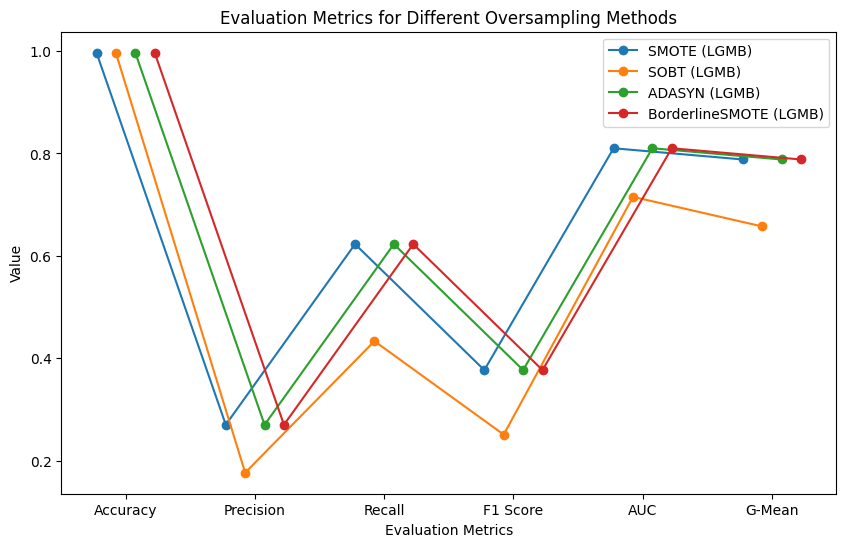

In [43]:
#Ploting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'G-Mean']
smote_values = [accuracy_sm, precision_sm, recall_sm, f1_sm, auc_sm, gmean_sm]
sobt_values = [accuracy_sobt, precision_sobt, recall_sobt, f1_sobt, auc_sobt, gmean_sobt]
adasyn_values = [accuracy_ada, precision_ada, recall_ada, f1_ada, auc_ada, gmean_ada]
smb_values = [accuracy_smb, precision_smb, recall_smb, f1_smb, auc_smb, gmean_smb]

models = ['SMOTE (LGMB)', 'SOBT (LGMB)', 'ADASYN (LGMB)', 'BorderlineSMOTE (LGMB)']
data = [smote_values, sobt_values, adasyn_values, smb_values]
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
x = np.arange(len(metrics))
width = 0.15
for i, model in enumerate(models):
    ax.plot(x + i*width, data[i], marker='o', label=model)

# Set the x-axis tick labels and positions
ax.set_xticks(x + (len(models)-1)*width/2)
ax.set_xticklabels(metrics)

# Set the axis labels and title
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Value')
ax.set_title('Evaluation Metrics for Different Oversampling Methods')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [44]:
#Comparison for Random Forest 

# Define the metrics and their corresponding values for each oversampling method and model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'G-Mean']
ada_rf_values = [accuracy_ada_rf, precision_ada_rf, recall_ada_rf, f1_ada_rf, auc_ada_rf, gmean_ada_rf]
smb_rf_values = [accuracy_smb_rf, precision_smb_rf, recall_smb_rf, f1_smb_rf, auc_smb_rf, gmean_smb_rf]
sm_rf_values = [accuracy_sm_rf, precision_sm_rf, recall_sm_rf, f1_sm_rf, auc_sm_rf, gmean_sm_rf]
sobt_rf_values = [accuracy_sobt_rf, precision_sobt_rf, recall_sobt_rf, f1_sobt_rf, auc_sobt_rf, gmean_sobt_rf]

# Create a DataFrame
data = [
    ada_rf_values,
    smb_rf_values,
    sm_rf_values,
    sobt_rf_values
]

rf_df = pd.DataFrame(data, columns=metrics, index=['ADASYN (RF)', 'BorderlineSMOTE (RF)', 'SMOTE (RF)', 'SOBT (RF)'])

print(rf_df)

                      Accuracy  Precision    Recall  F1 Score       AUC  \
ADASYN (RF)           0.999546   0.950000  0.778689  0.855856  0.889309   
BorderlineSMOTE (RF)  0.999546   0.950000  0.778689  0.855856  0.889309   
SMOTE (RF)            0.999546   0.950000  0.778689  0.855856  0.889309   
SOBT (RF)             0.999537   0.925532  0.769912  0.840580  0.884907   

                        G-Mean  
ADASYN (RF)           0.882402  
BorderlineSMOTE (RF)  0.882402  
SMOTE (RF)            0.882402  
SOBT (RF)             0.769836  


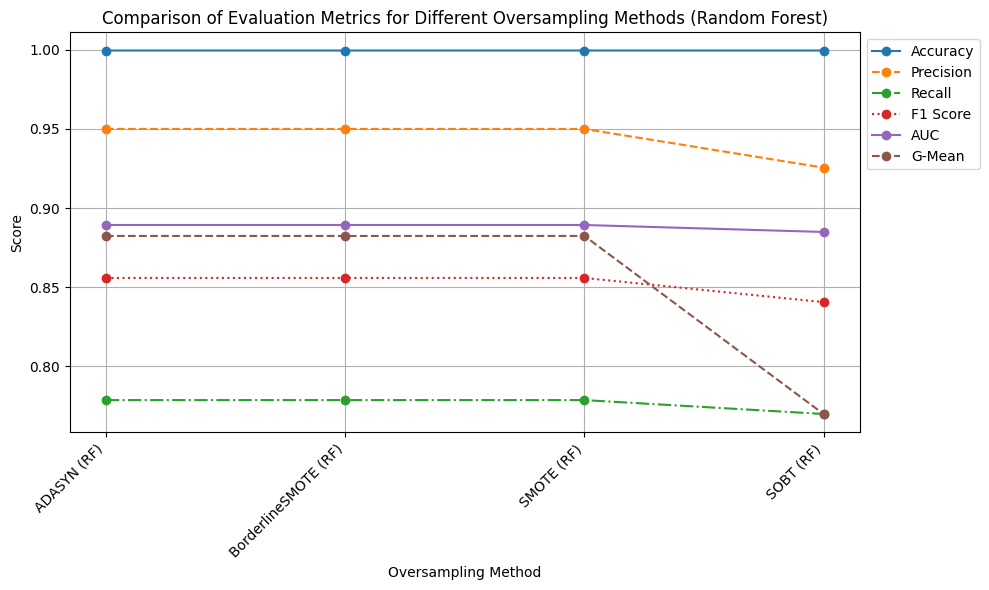

In [45]:
# Plotting
import matplotlib.pyplot as plt

# Define line styles for each metric
line_styles = ['-', '--', '-.', ':', '-', '--']

# Plotting
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.plot(rf_df.index, rf_df[metric], linestyle=line_styles[i], marker='o', label=metric)

plt.title('Comparison of Evaluation Metrics for Different Oversampling Methods (Random Forest)')
plt.xlabel('Oversampling Method')
plt.ylabel('Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
